In [1]:
import numpy as np
import astropy as ap
from astropy import units as u
import matplotlib.pyplot as plt
import pico, dft, agilent, timing, nch
import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
def plotting(x,y,title,xlab,ylab):
    plt.figure(figsize = (15,8))
    plt.plot(x,y, 'k')
    plt.title('{}'.format(title), fontsize = 25)
    plt.xlabel('{}'.format(xlab), fontsize = 23)
    plt.ylabel('{}'.format(ylab), fontsize = 23)
    plt.tick_params(labelsize = 21)
    plt.grid()

In [3]:
sunV = np.load('Sun_data_last.npz')['vv']
sunt = np.load('Sun_data_last.npz')['ttt']
print((sunt - sunt[0])/3600)[-1]
#cut the data because not good at the end

sunV = sunV[:-5000]
sunt = sunt[:-5000]

#average the voltage
sunV = sunV - np.mean(sunV)

#zeroed time
sunt = sunt - sunt[0]

#hours for sun 
sunHr = (sunt)/60/60

print('Recorded Sun for {} hours'.format(sunHr[-1]))

10.4632940347
Recorded Sun for 10.0004337161 hours


In [4]:
unix, mAlt, mAz, CAlt, cAz, wAlt, wAz, eAlt, eAz = np.genfromtxt('Sun_coord', skip_header= True).T

In [5]:
hrs = timing.julian_date(unix)
hrs =(hrs - hrs[0])*24

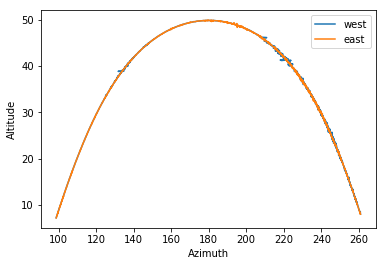

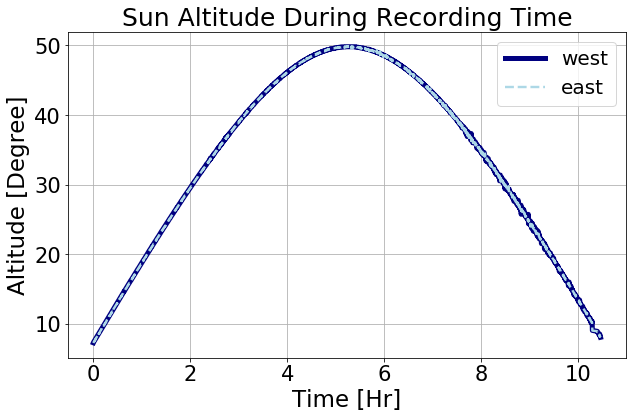

In [6]:
plt.plot(wAz, wAlt, label='west')
plt.plot(eAz, eAlt,label='east')
plt.legend()
plt.xlabel('Azimuth')
plt.ylabel('Altitude')

plt.figure(figsize =(10,6) )
plt.plot(hrs, wAlt, '-',color = 'navy', label = 'west', linewidth = 5)
plt.plot(hrs, eAlt, '--', color = 'lightblue',label = 'east', linewidth = 2.4)
plt.legend(fontsize = 20)
plt.grid()
plt.title('Sun Altitude During Recording Time', fontsize =25)
plt.xlabel('Time [Hr]',fontsize =23)
plt.ylabel('Altitude [Degree]', fontsize = 23)
plt.tick_params(labelsize = 21)
plt.savefig('sun_alt')

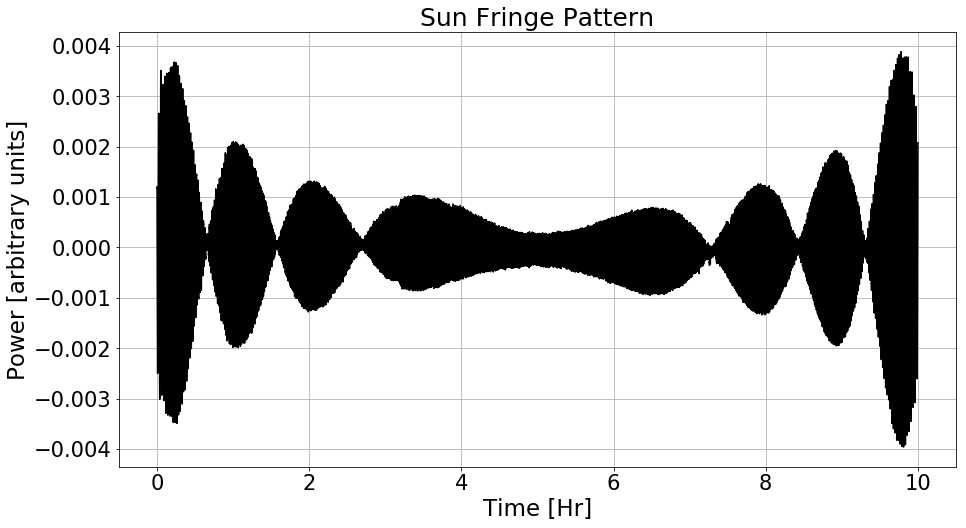

In [7]:
plotting(sunHr, sunV, 'Sun Fringe Pattern', 'Time [Hr]', 'Power [arbitrary units]')
plt.savefig('sun_power')

In [8]:
moonV = np.load('moonVolt_last.npz')['vv'][:-8000]
moont = np.load('moonVolt_last.npz')['ttt'][:-8000]

moonV = moonV - np.mean(moonV)
moont = moont - moont[0]

moonHr = (moont)/3600

moont[-1]/3600

10.475988605883387

In [9]:
unixM, mAltM, mAzM, cAltM, cAzM, wAltM, wAzM, eAltM, eAzM = np.genfromtxt('moonCoord', skip_header=True).T

In [10]:
unixHr = (unixM - unixM[0])/3600

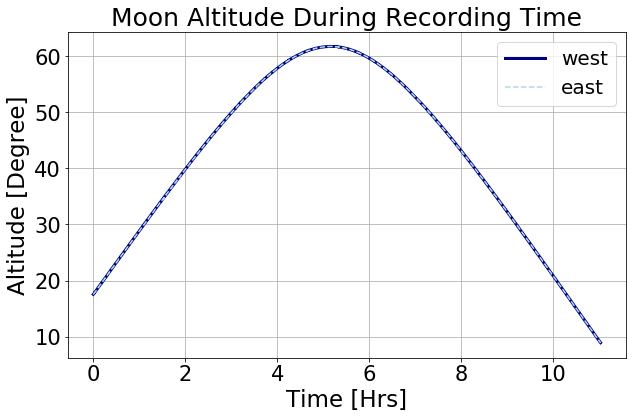

In [11]:
plt.figure(figsize = (10,6))
# plt.plot(jdC, mAltC, label= 'measured')
plt.plot(unixHr, wAltM, label = 'west', color = 'navy', linewidth = 3)
plt.plot(unixHr, eAltM, '--', label = 'east', color = 'lightblue',linewidth = 1.5)
plt.grid()
plt.legend(fontsize = 20)
plt.title('Moon Altitude During Recording Time', fontsize = 25)
plt.xlabel('Time [Hrs]', fontsize = 23)
plt.ylabel('Altitude [Degree]', fontsize = 23)
plt.tick_params(labelsize = 21)
plt.savefig('Moon_alt')

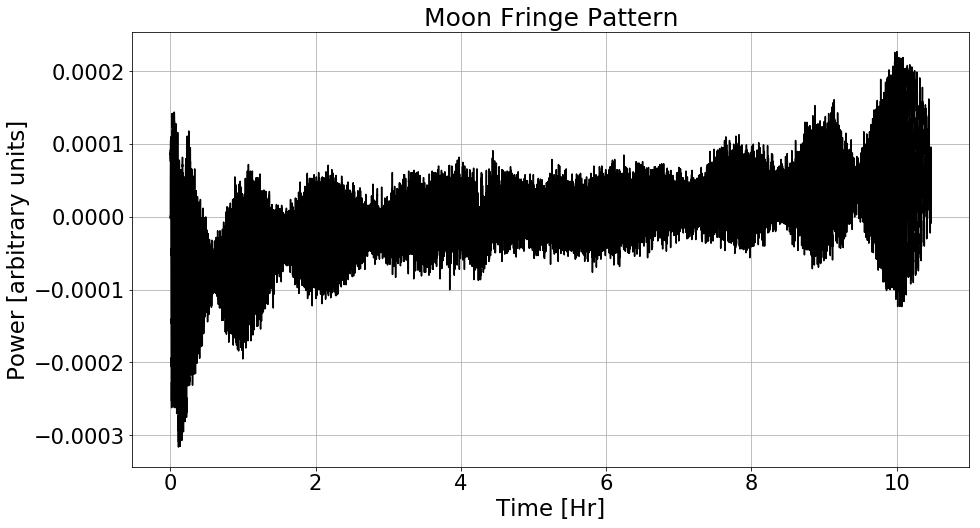

In [12]:
plotting(moonHr, moonV, 'Moon Fringe Pattern','Time [Hr]', 'Power [arbitrary units]')
plt.savefig('moon_power')

In [39]:
casV = np.load('Cas_data_last.npz')['vv']
cast = np.load('Cas_data_last.npz')['ttt']

# cut cas data in half because the beginning is off

casV = casV[81016:]
cast = cast[81016:]

casV = casV - np.mean(casV)
cast = cast - cast[0]

casHr = (cast)/60/60

print('Recorded Cas for {} hours'.format(casHr[-1]))

Recorded Cas for 11.2520833292 hours


In [40]:
jdC, mAltC, mAzC, cAltC, cAzC, wAltC, wAzC, eAltC, eAzC = np.genfromtxt('Cas_coord', skip_header=True).T

In [15]:
jdHrs = (jdC - jdC[0])*24

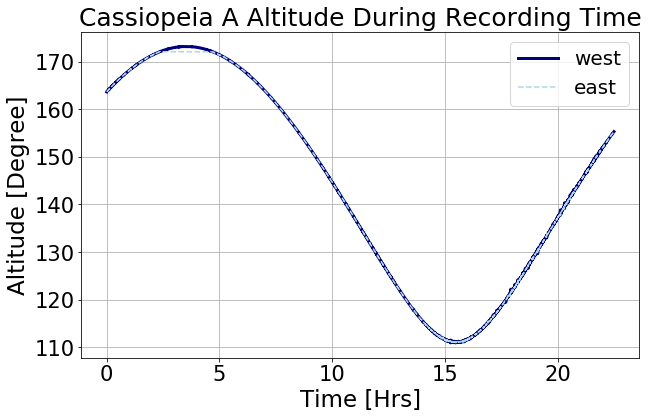

In [16]:
plt.figure(figsize = (10,6))
# plt.plot(jdC, mAltC, label= 'measured')
plt.plot(jdHrs, wAltC, label = 'west', color = 'navy', linewidth = 3)
plt.plot(jdHrs, eAltC, '--', label = 'east', color = 'lightblue',linewidth = 1.5)
plt.grid()
plt.legend(fontsize = 20)
plt.title('Cassiopeia A Altitude During Recording Time', fontsize = 25)
plt.xlabel('Time [Hrs]', fontsize = 23)
plt.ylabel('Altitude [Degree]', fontsize = 23)
plt.tick_params(labelsize = 21)
plt.savefig('Cas_alt')

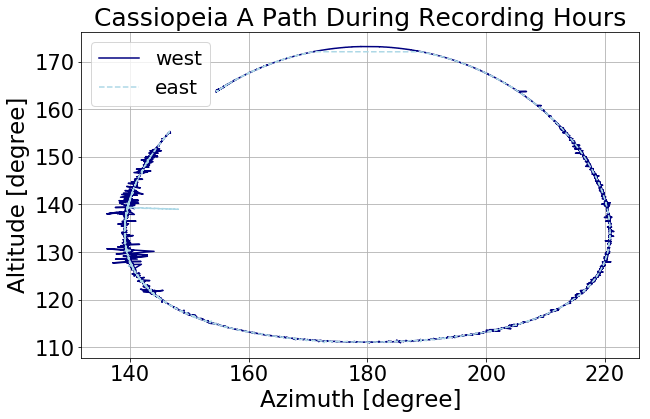

In [17]:
plt.figure(figsize = (10,6))
plt.plot(wAzC, wAltC, label='west', color = 'navy')
plt.plot(eAzC, eAltC,'--',label='east', color = 'lightblue')
plt.legend(fontsize = 20)
plt.grid()
plt.title('Cassiopeia A Path During Recording Hours', fontsize = 25)
plt.xlabel('Azimuth [degree]', fontsize = 23)
plt.ylabel('Altitude [degree]', fontsize = 23)
plt.tick_params(labelsize = 21)
plt.savefig('Cas_alt_az')

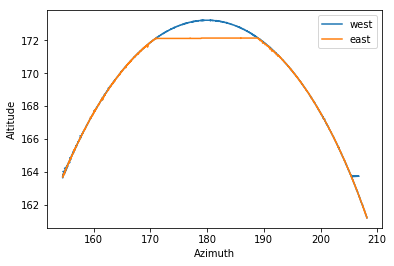

In [18]:
plt.plot(wAzC[:-4000], wAltC[:-4000], label='west')
plt.plot(eAzC[:-4000], eAltC[:-4000],label='east')
plt.legend()
plt.xlabel('Azimuth')
plt.ylabel('Altitude')

time 2458192.87961


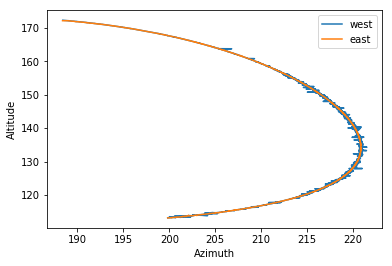

In [19]:
plt.plot(wAzC[1300:4000], wAltC[1300:4000], label='west')
plt.plot(eAzC[1300:4000], eAltC[1300:4000],label='east')
plt.legend()
plt.xlabel('Azimuth')
plt.ylabel('Altitude')
print('time {}'.format(jdC[1300]))

In [20]:
print(jdC[2500])

2458193.0596


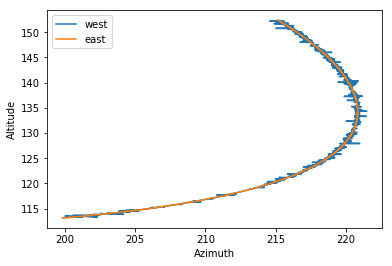

In [21]:
plt.plot(wAzC[2500:4000], wAltC[2500:4000], label='west')
plt.plot(eAzC[2500:4000], eAltC[2500:4000],label='east')
plt.legend()
plt.xlabel('Azimuth')
plt.ylabel('Altitude')

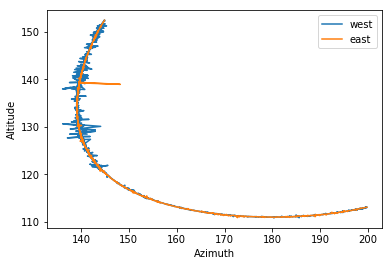

In [22]:
plt.plot(wAzC[4000:6000], wAltC[4000:6000], label='west')
plt.plot(eAzC[4000:6000], eAltC[4000:6000],label='east')
plt.legend()
plt.xlabel('Azimuth')
plt.ylabel('Altitude')

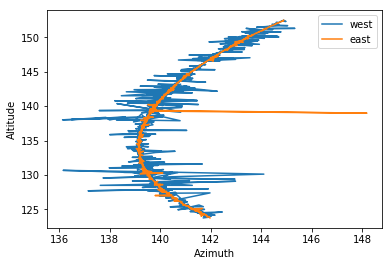

In [23]:
plt.plot(wAzC[5000:6000], wAltC[5000:6000], label='west')
plt.plot(eAzC[5000:6000], eAltC[5000:6000],label='east')
plt.legend()
plt.xlabel('Azimuth')
plt.ylabel('Altitude')

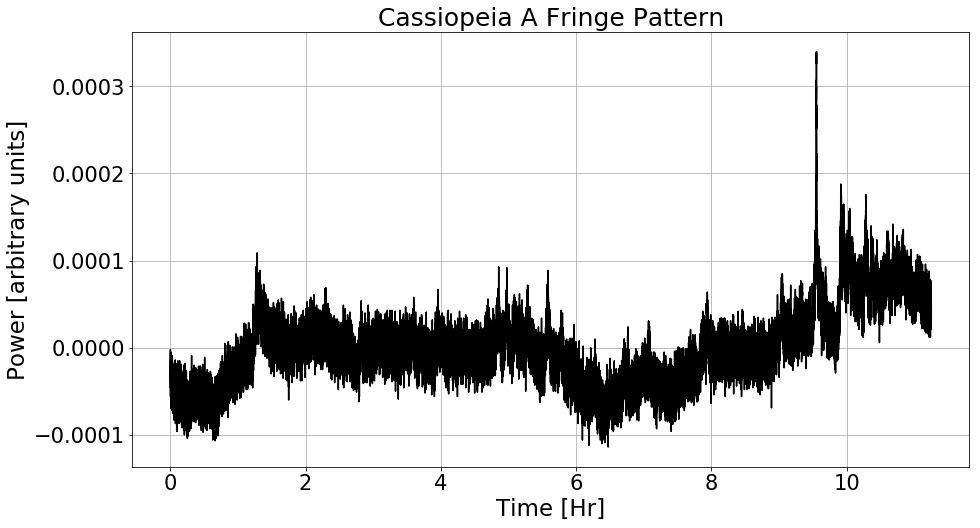

In [41]:
plotting(casHr, casV, 'Cassiopeia A Fringe Pattern', 'Time [Hr]', 'Power [arbitrary units]')
plt.savefig('Cas_power')

# FFT power etc..

In [25]:
def powerSplit(dVV, dTT, minW):
    """
    dVV: volt array
    dTT: time array in seconds
    """
    minD = int(dTT[-1]/60) # number of minutes recording data
    d_min = int(len(dVV)/minD) # number of points per minute
    d_per_window = d_min*minW
    rm = len(dVV)%(d_per_window)
    dVV = dVV[:-rm]
    dTT = dTT[:-rm]
    row = len(dVV)/d_per_window
    col = d_per_window
    
    dvv = dVV.reshape(row, col)
    PR = np.zeros((row, col))
    for i in range(row):
        pr = np.fft.fftshift(abs(np.fft.fft(dvv[i]))**2)
        PR[i] = pr
    return PR

In [26]:
pr = powerSplit(sunV,sunt,7).T

(1680, 85)

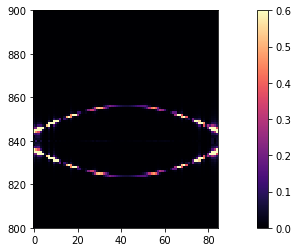

In [27]:
### pr = powerSplit(vv, tt_cut,5)
plt.figure(figsize = (14,4))
plt.imshow(pr, 'magma', clim = (0,0.6))
plt.ylim(800,900)
plt.colorbar()
# plt.xlim(590, 650)
pr.shape

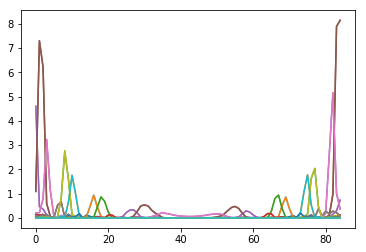

In [28]:
for i in range(len(pr[:,0])):
    plt.plot(np.arange(85),pr[i], label = '{}'.format(i))
# plt.xlim(850,890)
plt.show()

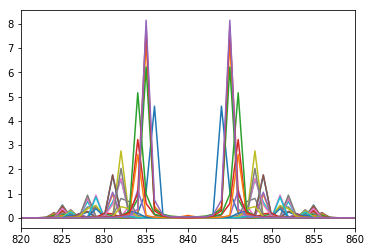

In [29]:
for i in range(len(pr[0,:])):
    plt.plot(pr[:,i], label = '{}'.format(i))
plt.xlim(820,860)
plt.show()


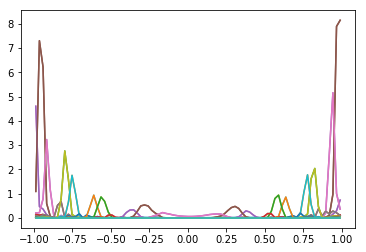

In [30]:
for i in range(len(pr[:,0])):
    freq = np.fft.fftshift(np.fft.fftfreq(len(pr[i]), d = 0.5))
    plt.plot(freq, pr[i])
# plt.xlim(-0.05, 0.05)

(-0.02, 0.02)

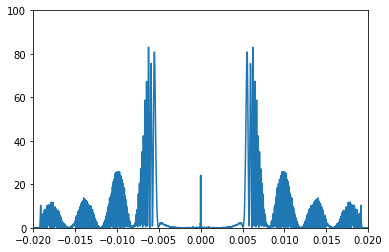

In [31]:

ff = np.fft.fft(sunV)
power = np.fft.fftshift(abs(ff)**2)
freq = np.fft.fftshift(np.fft.fftfreq(len(sunt), d = 0.5))
plt.plot(freq,power)
plt.ylim(0,100)
plt.xlim(-0.02, 0.02)

In [33]:
casV = casV[33183:64286]
cast = cast[33183:64286]

In [34]:
casPr = powerSplit(casV, cast, 15).T
casPr.shape

(870, 35)

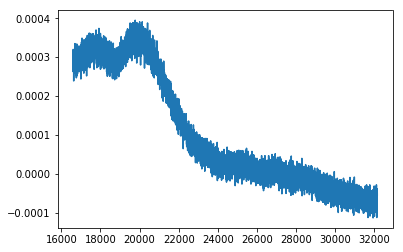

In [35]:
plt.plot(cast, casV)

(500, 400)

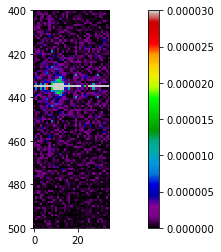

In [36]:
plt.figure(figsize = (14,4))
plt.imshow(casPr, 'hot', clim = (0,0.00003)).set_cmap('nipy_spectral')
# plt.ylim(800,900)
plt.colorbar()
# plt.ylim(250,375)
plt.ylim(500,400)

# Baseline Stuff

In [38]:
Bew = 15 # Estimate value of East-West Baseline is 20 meters from lab manual 
lam = 2.5e-2 # Incoming wavelength of 2.5cm 
Bns = 0 # Estimate value of North-South Baseline is 0 meters from lab manual 

Fringe_max = ((Bew-Bns)/lam) # in cycles per radian 

fringe_max = Fringe_max*(2*np.pi/(24*3600))
print(str(fringe_max) + ' cycles per second is the maximum local fringe frequency')
print(str(round(fringe_max*1000,1)) + " mHz is the max fringe frequency with our given assumptions.")

0.0436332312999 cycles per second is the maximum local fringe frequency
43.6 mHz is the max fringe frequency with our given assumptions.


### Fourier stuff


In [42]:
ffC = np.fft.fft(casV)
freqC = np.fft.fftfreq(len(casV),d=0.5)

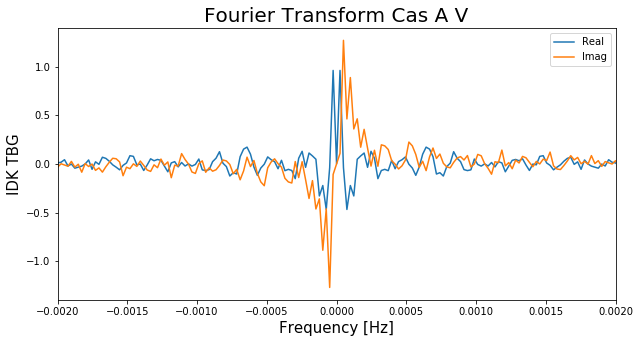

In [43]:
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(freqC),np.fft.fftshift(ffC.real))
plt.plot(np.fft.fftshift(freqC),np.fft.fftshift(ffC.imag))
plt.title('Fourier Transform Cas A V',fontsize = 20)
plt.xlabel('Frequency [Hz]',fontsize = 15)
plt.ylabel('IDK TBG',fontsize =15)
plt.legend(['Real','Imag'],loc='upper right')
plt.xlim(-0.002,0.002)
plt.show()

/Users/arceliahermosillo/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


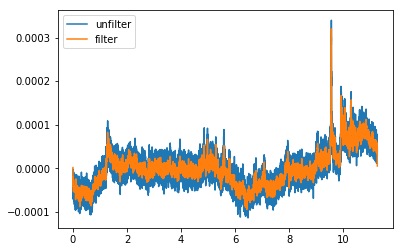

In [44]:
filterC = ffC
filterC[abs(freqC)>fringe_max] = 0

plt.plot(casHr, casV, label = 'unfilter')
plt.plot(casHr, np.fft.ifft(ffC), label = 'filter')
plt.legend()

### Sun Fourier Filter

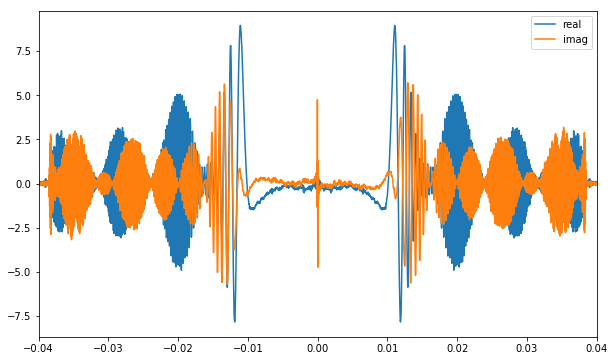

In [45]:
ffS = np.fft.fft(sunV)
freqS = np.fft.fftfreq(len(sunV), d=0.25)

plt.figure(figsize = (10,6))
plt.plot(np.fft.fftshift(freqS), np.fft.fftshift(ffS.real), label = 'real')
plt.plot(np.fft.fftshift(freqS), np.fft.fftshift(ffS.imag), label = 'imag')
plt.xlim(-0.04, 0.04)
plt.legend()

In [46]:
freqS

array([  0.00000000e+00,   2.77762347e-05,   5.55524693e-05, ...,
        -8.33287040e-05,  -5.55524693e-05,  -2.77762347e-05])

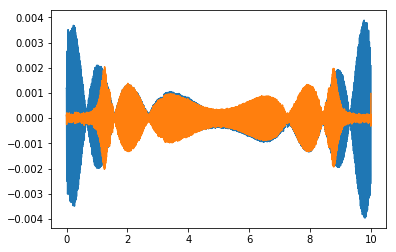

In [47]:
filterSun = ffS
filterSun[abs(freqS)<0.02] = 0
plt.plot(sunHr, sunV)
plt.plot(sunHr, np.fft.ifft(filterSun))

In [48]:
def convert_az_alt_to_ha_dec(az,alt,phi=37.871853):
    x0 = np.cos(np.radians(alt))*np.cos(np.radians(az))
    x1 = np.cos(np.radians(alt))*np.sin(np.radians(az))
    x2 = np.sin(np.radians(alt))

    R = np.matrix([[-np.sin(np.radians(phi)),0,np.cos(np.radians(phi))],[0,-1,0],[np.cos(np.radians(phi)),0,np.sin(np.radians(phi))]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(np.transpose(R),x)

    ha = float(np.degrees(np.arctan2(xp[1],xp[0]))) 
    dec = float(np.degrees(np.arcsin(xp[2]))) 

    return ha, dec

In [49]:
cCoord = np.load('cas_AlAz.npy')[81016:]
casAl = cCoord[:,0][:,0]
casAz = cCoord[:,0][:,1]

sCoord = np.load('SUNcoord_ALAZ.npz')
sunAl = sCoord['arr_0'][:-5000]
sunAz = sCoord['arr_1'][:-5000]

moonAl = np.load('moon_Al.npy')[:-8000]
moonAz = np.load('moon_Az.npy')[:-8000]

In [50]:
L = nch.lat

In [51]:
haCas = []
decCas = []

for i, j in zip(casAz, casAl):
    haC, decC = convert_az_alt_to_ha_dec(i, j)
    haCas.append(haC)
    decCas.append(decC)
    
haCas = np.array(haCas)
decCas = np.array(decCas)

In [52]:
haMoon = []
decMoon = []

for i, j in zip(moonAz, moonAl):
    haM, decM = convert_az_alt_to_ha_dec(i, j)
    haMoon.append(haM)
    decMoon.append(decM)
    
haMoon = np.array(haMoon)
decMoon = np.array(decMoon)

In [53]:
haSun = []
decSun = []
for i,j in zip(sunAz, sunAl):
    has, decs = convert_az_alt_to_ha_dec(i,j)
    haSun.append(has)
    decSun.append(decs)
    
haSun = np.array(haSun)
decSun = np.array(decSun)

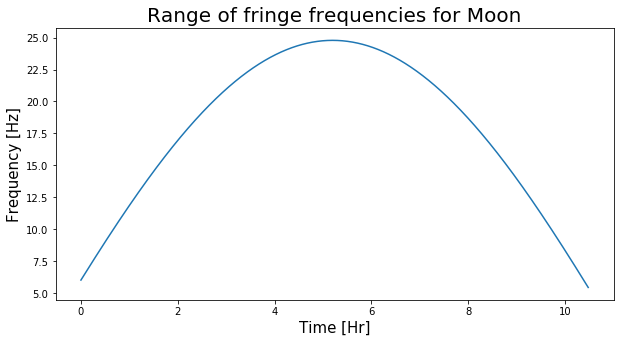

In [54]:
fringeMoon = ((Bew*np.cos(np.radians(decMoon))/lam)*np.cos(np.radians(haMoon)))*(2*np.pi/3600*24) 
plt.figure(figsize=(10,5))
plt.plot(moonHr,fringeMoon)
plt.title('Range of fringe frequencies for Moon',fontsize=20)
plt.xlabel('Time [Hr]',fontsize= 15)
plt.ylabel('Frequency [Hz]',fontsize =15)
plt.show()

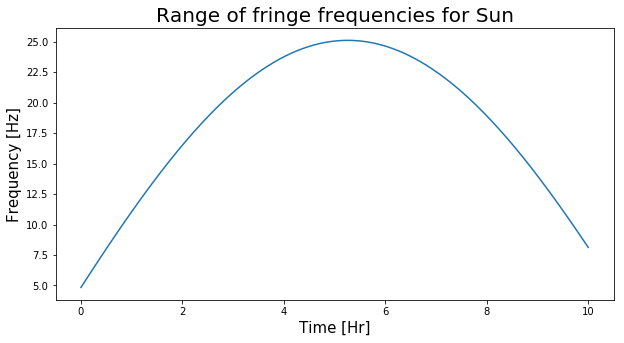

In [55]:
fringeSun = ((Bew*np.cos(np.radians(decSun))/lam)*np.cos(np.radians(haSun)))*(2*np.pi/3600*24) 
plt.figure(figsize=(10,5))
plt.plot(sunHr,fringeSun)
plt.title('Range of fringe frequencies for Sun',fontsize=20)
plt.xlabel('Time [Hr]',fontsize= 15)
plt.ylabel('Frequency [Hz]',fontsize =15)
plt.show()

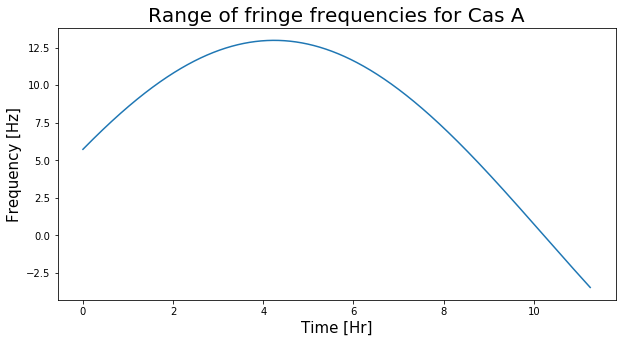

In [56]:
f_fringe = ((Bew*np.cos(np.radians(decCas))/lam)*np.cos(np.radians(haCas)))*(2*np.pi/3600*24) 
plt.figure(figsize=(10,5))
plt.plot(casHr,f_fringe)
plt.title('Range of fringe frequencies for Cas A',fontsize=20)
plt.xlabel('Time [Hr]',fontsize= 15)
plt.ylabel('Frequency [Hz]',fontsize =15)
plt.show()

### Least Square shit for Cas A

In [57]:
casBew = np.linspace(14,18,1000)
casBns = 0 
lam = 2.5e-2
delta = np.mean(decCas)
L = nch.lat

casQew = (casBew/lam)*np.cos(np.radians(delta))
casQns = (casBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))

In [58]:
sumResEw = []
for i in range(int(len(casQew))):
   
    hs = haCas
    nuTau = casQew[i]*np.sin(np.radians(hs)) + casQns*np.cos(np.radians(hs))

    X1 = np.cos(2*np.pi*nuTau)
    X2 = np.sin(2*np.pi*nuTau)
    F = casV

    X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
    Y = np.matrix([[F[i]] for i in range(len(X1))])
   

    alpha = np.dot(X.T,X)
    beta = np.dot(X.T,Y)

    alpha_inv = np.linalg.inv(alpha)

    a = np.dot(alpha_inv,beta)

    A = float(a[0])
    B = float(a[1])
    ybar = np.dot(X,a)   #estiamted values of voltages from model
    dely = Y - ybar      #Residuals

    s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

    diag_inva = np.diag(alpha_inv)

    vardc = s_sq*diag_inva
    dc = np.diag(alpha_inv)

    ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
    dely = np.asarray(dely)
    S = np.sum(dely**2)
    sumResEw.append(S)

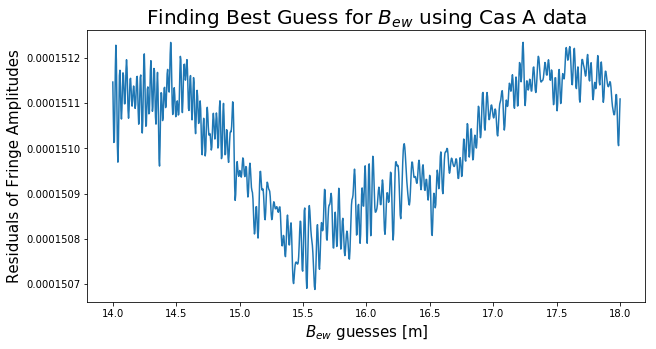

In [59]:
plt.figure(figsize=(10,5))
plt.plot(casBew,sumResEw)
plt.title('Finding Best Guess for $B_{ew}$ using Cas A data',fontsize=20)
plt.ylabel('Residuals of Fringe Amplitudes',fontsize = 15)
plt.xlabel('$B_{ew}$ guesses [m]',fontsize=15)
plt.show()

In [60]:
np.argwhere(sumResEw == min(sumResEw))

array([[398]])

In [61]:
print('The best guess is {}'.format(casBew[398]) )

The best guess is 15.5935935936


In [62]:
n = 50
casBew = np.linspace(14,16,n)
casBns = np.linspace(0,2,n)
lam = 2.5e-2
delta = np.mean(decCas)
L = nch.lat
hs = haCas


CASQew = (casBew/lam)*np.cos(np.radians(delta))
CASQns = (casBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))
sinh = np.sin(np.radians(hs))
cosh = np.cos(np.radians(hs))

CASQew

array([ 289.16068067,  290.00371473,  290.84674878,  291.68978284,
        292.53281689,  293.37585095,  294.218885  ,  295.06191905,
        295.90495311,  296.74798716,  297.59102122,  298.43405527,
        299.27708933,  300.12012338,  300.96315744,  301.80619149,
        302.64922554,  303.4922596 ,  304.33529365,  305.17832771,
        306.02136176,  306.86439582,  307.70742987,  308.55046393,
        309.39349798,  310.23653203,  311.07956609,  311.92260014,
        312.7656342 ,  313.60866825,  314.45170231,  315.29473636,
        316.13777042,  316.98080447,  317.82383852,  318.66687258,
        319.50990663,  320.35294069,  321.19597474,  322.0390088 ,
        322.88204285,  323.72507691,  324.56811096,  325.41114501,
        326.25417907,  327.09721312,  327.94024718,  328.78328123,
        329.62631529,  330.46934934])

In [63]:
hs

array([ -63.79362563,  -63.7915374 ,  -63.78944783, ...,  105.44128136,
        105.44337   ,  105.44545931])

In [64]:
rescas = []
Acas = []
Bcas = []
Scas = []
for i in range(int(len(CASQew))):
    cQew = CASQew[i]
    for k in range(int(len(CASQns))):
        nuTau = cQew*sinh + CASQns[k]*cosh

        X1 = np.cos(2*np.pi*nuTau)
        X2 = np.sin(2*np.pi*nuTau)
        F = casV

        X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
        Y = np.matrix([[F[i]] for i in range(len(X1))])


        alpha = np.dot(X.T,X)
        beta = np.dot(X.T,Y)

        alpha_inv = np.linalg.inv(alpha)

        a = np.dot(alpha_inv,beta)

        A = float(a[0])
        B = float(a[1])
        ybar = np.dot(X,a)   #estiamted values of voltages from model
        dely = Y - ybar      #Residuals

        s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

        diag_inva = np.diag(alpha_inv)

        vardc = s_sq*diag_inva
        dc = np.diag(alpha_inv)

        ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
        dely = np.array(dely)
        S = np.sum(dely**2)
        rescas.append(S)
        Acas.append(A)
        Bcas.append(B)
        Scas.append(s_sq)

In [65]:
# rescas

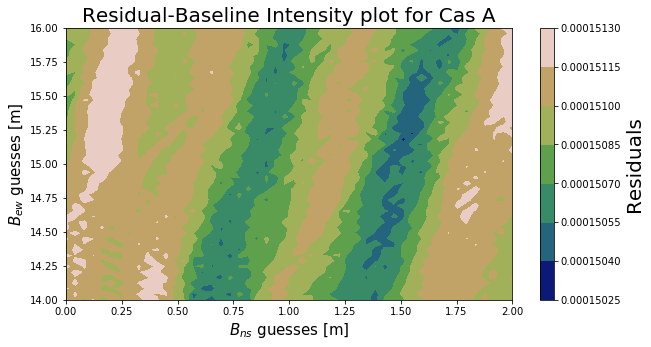

The global minimum from our Cas A data corresponds to a minimum residual of 0.000150337911629 at the point( 1.51020408163 meters, 15.1836734694 meters). The coefficients of A and B are 3.79512013981e-06 3.24173488954e-06. The variance at this global minimum [[  1.85570286e-09]]


In [66]:
rescas = np.array(rescas)
rescass = rescas.reshape(n,n)

plt.figure(figsize=(10,5))

plt.title('Residual-Baseline Intensity plot for Cas A',fontsize =20)
plt.xlabel('$B_{ns}$ guesses [m]',fontsize = 15)
plt.ylabel('$B_{ew}$ guesses [m]',fontsize = 15)
plt.contourf(casBns,casBew,rescass,cmap='gist_earth')
cbar = plt.colorbar()
cbar.set_label('Residuals',fontsize = 20)

# plt.xlim(0.8,0.9)
# plt.ylim(15,15.2)
plt.show()


BEW = []
BNS = []
for i in range(int(len(casBew))):
    cQew = casBew[i]
    for k in range(int(len(casBew))):
        BEW.append(cQew)
    for l in range(int(len(casBns))):
        BNS.append(casBns[l])
zcas = []
BCAS = np.array(zip(BEW,BNS,rescas))
for i in range(int(len(rescas))):
    if rescas[i] == min(rescas):
        zcas.append(i)


        
print('The global minimum from our Cas A data corresponds to a minimum residual of ' + str(BCAS[zcas[0]][2]) +' at the point' + '( ' + 
      str(BCAS[zcas[0]][1]) + ' meters, ' + str(BCAS[zcas[0]][0]) + ' meters).' + ' The coefficients of A and B are ' + str(Acas[zcas[0]]) + ' ' +
     str(Bcas[zcas[0]]) + '. The variance at this global minimum ' + str(Scas[zcas[0]]) )

In [67]:
def first_derivative(x,y):
    # we need to specify the size of dy ahead because diff returns
# an array of n-1 elements
    dy = np.zeros(y.shape,float) # we know it will be this size
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    
    return dy

In [68]:
Bcas_slice = []
for i in range(n):
    slices = BCAS[n*i:n*(i+1)]
    Bcas_slice.append(slices)

In [69]:

Y = []
for i in range(len(Bcas_slice)):
    for k in range(len(Bcas_slice)):
        y = Bcas_slice[k][i][2]
        Y.append(y)
Y = np.asarray(Y)
Ynew = np.asarray(Y).reshape(n,n)


In [70]:
bEW = []
bNS = []
for i in range(int(len(casBns))):
    swag = casBns[i]
    for k in range(int(len(casBns))):
        bEW.append(swag)
    for l in range(int(len(casBew))):
        bNS.append(casBew[l])
Zcas = []
bCAS = np.asarray(zip(bEW,bNS,Y))
for i in range(int(len(Y))):
    if Y[i] == min(Y):
        print(i)
        Zcas.append(i)

1879


In [71]:
DS_dQew = []
for i in range(len(Ynew)):
    Dy_dy = first_derivative(casBew,Ynew[i])
    DS_dQew.append(Dy_dy)
DS_dQew = np.asarray(DS_dQew)

DS2_dQew2 = [] ### this is finding the second derivative of our contour with respect to Qew 
for l in range(len(DS_dQew)):
    Dy2_dy2 = first_derivative(casBew,DS_dQew[l])
    DS2_dQew2.append(Dy2_dy2)
DS2_dQew2 = np.asarray(DS2_dQew2)
alpha_11 = 0.5*DS2_dQew2.reshape(n**2,1)[Zcas[0]]*(lam/np.cos(np.radians(delta)))
print(alpha_11)

DS2_dQewdQns = []### this is finding the second derivative of our contour with respect to Qew and then Qns
for l in range(len(DS_dQew)):
    Dy2_dy2 = first_derivative(casBns,DS_dQew[l])
    DS2_dQewdQns.append(Dy2_dy2)
DS2_dQewdQns = np.asarray(DS2_dQewdQns)
alpha_12 = 0.5*DS2_dQewdQns.reshape(n**2,1)[Zcas[0]]*((lam)**2)/(((np.cos(np.radians(delta)))**2)*np.sin(np.radians(L)))
print(alpha_12)

[ -2.72034083e-06]
[ -2.14537465e-07]


In [72]:
DS_dQns = []
for i in range(len(rescass)):
    Dy_dx = first_derivative(casBns,rescass[i])
    DS_dQns.append(Dy_dx)
DS_dQns = np.asarray(DS_dQns)

DS2_dQns2 = []
for l in range(len(DS_dQns)):
    Dy2_dx2 = first_derivative(casBns,DS_dQns[l])
    DS2_dQns2.append(Dy2_dx2)
DS2_dQns2 = np.asarray(DS2_dQns2)
alpha_22 = 0.5*DS2_dQns2.reshape(n**2,1)[Zcas[0]]
alpha_22*(lam/(np.cos(np.radians(delta))*np.sin(np.radians(L))))

array([  6.20923442e-07])

In [73]:
alphas = np.matrix([[float(alpha_11),float(alpha_12)],[float(alpha_12),float(alpha_22)]])
gg = np.linalg.inv(alphas)
vardc= Scas[zcas[0]]*np.diag(np.abs(gg))
casvar =  np.asarray(np.sqrt(vardc))
print('The uncertainty for the EW baseline is ' + str(casvar[0][0]) + ' meters and the uncertainty for the NS baseline is ' + str(casvar[0][1]) + 'meters using the cas data. ')

The uncertainty for the EW baseline is 0.0260901408046 meters and the uncertainty for the NS baseline is 0.015335889393meters using the cas data. 


In [74]:
lam = 2.5e-2
Fcas = Acas[zcas[0]]*np.cos(np.radians(2*np.pi*(BCAS[zcas[0]][0]/lam)*np.cos(np.radians(delta))*np.cos(np.radians(haCas)))) + Bcas[zcas[0]]*np.sin(np.radians(2*np.pi*(BCAS[zcas[0]][0]/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))*np.cos(np.radians(haCas))))

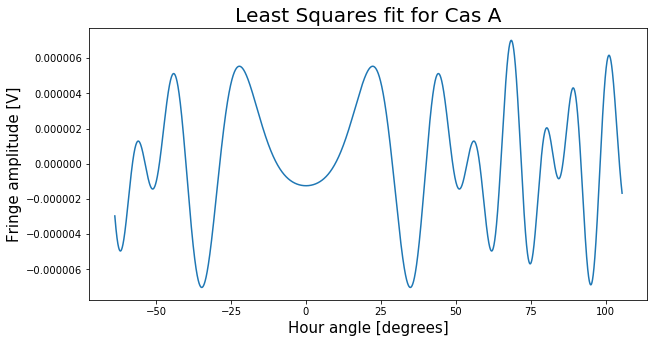

In [75]:
plt.figure(figsize=(10,5))
plt.plot(haCas,Fcas)
plt.title('Least Squares fit for Cas A',fontsize = 20)
plt.xlabel('Hour angle [degrees]',fontsize = 15)
plt.ylabel('Fringe amplitude [V]',fontsize = 15)
plt.show()

In [76]:
Bew


15

In [77]:

from scipy.signal import hilbert, chirp
analytic_sig_sun = hilbert(sunV)
amp_envelope_sig = np.abs(analytic_sig_sun)


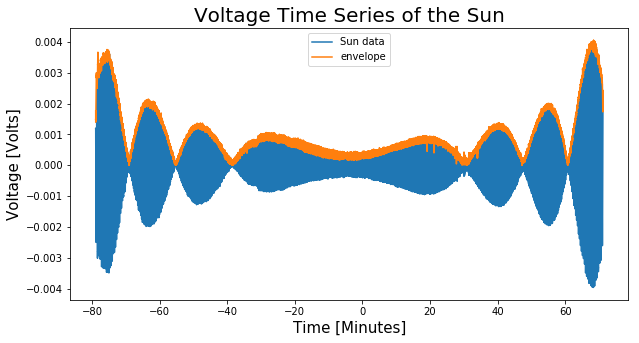

In [78]:
plt.figure(figsize=(10,5))
plt.plot(haSun,sunV)
plt.plot(haSun,amp_envelope_sig)
plt.title('Voltage Time Series of the Sun',fontsize=20)
plt.xlabel('Time [Minutes]',fontsize=15)
plt.ylabel('Voltage [Volts]',fontsize=15)
plt.legend(['Sun data','envelope'],loc='upper center')
plt.show()

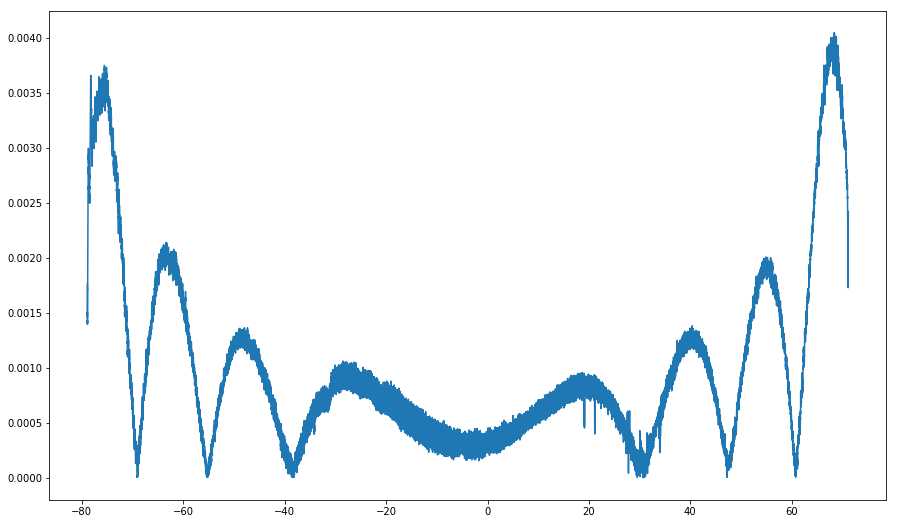

In [79]:
plt.figure(figsize = (15, 9))
plt.plot(haSun,amp_envelope_sig)

In [80]:
len(fringeSun)

144008

In [81]:
Bew = 15.1836734694

In [86]:
def Mf_theory(ff_R,N,R):
    mf_th = []
    for r,ffr in zip(R,ff_R):
        mf = 0
        for n in range(N):
            mf += np.sqrt(1 - (n/float(N))**2)*np.cos(2.*np.pi*ffr*n/N)
        deltah = r/float(N)
        mf_th.append(deltah*mf/2)
    return np.array(mf_th)
        

In [87]:
ffR = np.linspace(0,50,500)
rr = np.linspace(0,10,500)

In [ ]:
mfth = Mf_theory(ffR, 1000,rr)

In [85]:
plt.plot(ffR, mfth)
plt.xlim(0,5)

NameError: name 'mfth' is not defined

In [ ]:
fringeSun = ((Bew*np.cos(np.radians(decSun))/lam)*np.cos(np.radians(haSun)))


In [ ]:
plt.figure(figsize =(12,7))
plt.plot(fringeSun, sunV)
plt.xlim(115,150)

In [ ]:
sunV[:39]

In [ ]:
mfth[:50]

In [ ]:
(ffR[11]/fringeSun[37])*180/np.pi

In [ ]:
fringeMoon = ((Bew*np.cos(np.radians(decMoon))/lam)*np.cos(np.radians(haMoon)))*(2*np.pi/3600*24) 


In [ ]:
plt.plot(fringeMoon, moonV)
# plt.xlim(125, 150)

In [ ]:
moonV[340:400]

In [ ]:
(ffR[11]/fringeMoon[347])*180/np.pi

In [ ]:
# np.argwhere(abs(mfth)<0.001)

In [ ]:
mfth[0]

In [ ]:
mfth[7200]

In [ ]:
mfth[21601]

In [ ]:
mfth[36002]

In [ ]:
mfth[50402]

In [ ]:
mfth[64803]

In [ ]:
mfth[79204]

In [ ]:
mfth[93604]

In [ ]:
mfth[108005]

In [ ]:
mfth[122406]

In [ ]:
mfth[136807]

In [ ]:
xbessel = abs(haSun[:len(haSun)/2])
ybessel = amp_envelope_sig[:len(haSun)/2]

In [ ]:
plt.plot(abs(xbessel),ybessel)

In [ ]:
abs(xbessel)

In [ ]:
import scipy as sp


In [ ]:
besY = sp.special.jn(xbessel,30)
besYY = sp.special.yn(3, xbessel)

In [ ]:
plt.plot(xbessel, besY)
plt.plot(xbessel, besYY)

In [ ]:
# from scipy.special import yn
# from scipy.optimize import curve_fit
# from numpy import sin,linspace,pi

# a=3#choose the order a here!
# func = lambda var,b : yn(a,b*var)


# [b], pcov = curve_fit(func,xbessel, ybessel) # x and y are my data points
# print b

In [ ]:
# from scipy.special import jn
# from scipy.optimize import curve_fit
# from numpy import sin,linspace,pi

# a=30#choose the order a here!
# func = lambda var,b : jn(b*var,a)


# [b], pcov = curve_fit(func,xbessel, ybessel) # x and y are my data points
# print b